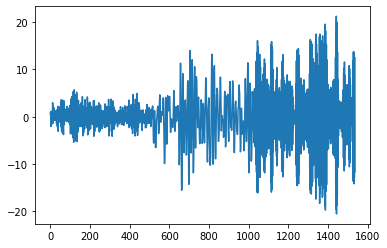

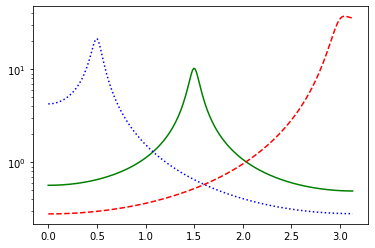

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 20 11:14:14 2020
@contact: atto / abatt@univ-smb.fr
"""
#%%
####################################################################
#################################   EXERCICE 3   ###################
####################################################################
#                    Modèles autorégressifs
####################################################################
####################################################################
## Etude d-une serie temporelle (non-stationnaire globalement)
##    mais composee par juxtaposition de 3 blocs stationnaires
####################################################################
####################################################################
# Utiliser systematique l-aide de python (fonction help), Exemple :
#    help(int) pour obtenir l-aide sur la fonction "int"
#%% 
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np #pour gerer les moyennes + covariances +++
####################################################################
#############   EXERCICE 3 / Partie 1            ###################
####################################################################
n=1536 #  nombre de donnees a genener
#% Sequences des parametres des 3 modeles AR du second ordre
a=[
    [1,-0.1344,0.9025], # coefficients du premier processus AR
    [1,-1.6674,0.9025], # Ccoefficients du second processus AR
    [1, 1.7820,0.8100]  # coefficients du troisieme processus AR
]

####################################################################
## Generer une serie temporelle (non-stationnaire globalement)
##    composee de 3 blocs stationnaires
####################################################################
####################################################################
## Generation et juxtaposition des 3 blocs de largeur n/3 chacun
t=range(-2,n-1)
y=[k*0 for k in t]
for k in range(1,int(n/3)):
    y[k+1]=-a[0][1]*y[k]-a[0][2]*y[k-1]+aleas.gauss(0,1)
for k in range(int(n/3)+1,2*int(n/3)):
    y[k+1]=-a[1][1]*y[k]-a[1][2]*y[k-1]+aleas.gauss(0,1)
for k in range(2*int(n/3)+1,n):
    y[k+1]=-a[2][1]*y[k]-a[2][2]*y[k-1]+aleas.gauss(0,1)
	
y=y[3:]  # suppression des donnees transitoires
t=t[3:]
# Trace- de la serie
plt.plot(t,y,label='Data = juxtapososition de 3 sous-series stationnaires')
plt.show()
#
###########################################################################
#%%
###########################################################################
# Calcul et trace-s des spectres des trois sous-series a partir de freqz
#  Puisque l on connait les coefficients, le calcul est fait directement
#  a- partir des coefficients (ne depend donc pas du nombre d-echantillons) 
# 

def spectre(*args): 
	Np = 256 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)

f,mag=spectre(a[0],a[1],a[2])
## Calcul des spectres des trois sous-series 
plt.semilogy(
	f,mag[0],'-g',
	f,mag[1],':b',
	f,mag[2],'--r'
)
## Traces des spectres des trois sous-series 
plt.show()
#
###########################################################################
#%%
# On choisit de decrire y par un modele AR d-ordre 3, puis d-ordre 4.
#    Estimation des coefficients des modeles AR d-ordres 3 et 4
# re-utiliser la partie deja ecrite pour superposer les estimations locales de spectres avec le resultat escompte-

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [1 ; 1536]')

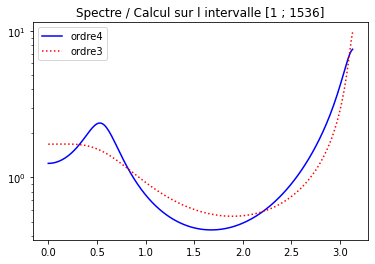

In [25]:
import numpy as np
import matplotlib.pyplot as plt
Np = 256
n=1536
y1=np.transpose(np.array([*y,0,0,0,0]))
y2=np.transpose(np.array([0,*y,0,0,0]))
y3=np.transpose(np.array([0,0,*y,0,0]))
y4=np.transpose(np.array([0,0,0,*y,0]))
y5=np.transpose(np.array([0,0,0,0,*y]))
A=np.array([y1,y2,y3,y4,y5])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 5*5


#Calcul des coefficients par Yule-Walker
E=np.dot(-np.linalg.inv(D[0:4,0:4]),np.transpose(D[0,1:5])) #ordre 4
H=np.dot(-np.linalg.inv(D[0:3,0:3]),np.transpose(D[0,1:4])) #ordre 3
E1=np.transpose([1,*np.transpose(E)]) #vecteur de coefficients incluant a0(ordre 4)
H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 3)


# Tracé des spectres estimés
[h11,w]=freqz(1,E1,Np) # ordre 4
[h12,w]=freqz(1,H1,Np) # ordre 3
mag1=abs(h11)
mag2=abs(h12)

f,mag = spectre(E1,H1)
plt.figure()
plt.semilogy(
    f,mag[0],'-b',
    f,mag[1],':r'
)
plt.legend(['ordre4', 'ordre3'])
plt.title("Spectre / Calcul sur l intervalle [1 ; " + str(n) + ']')



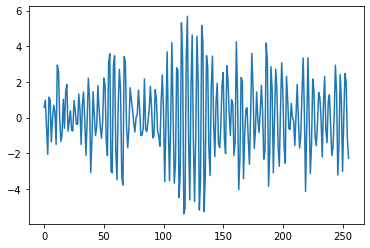

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [1 ; 256]')

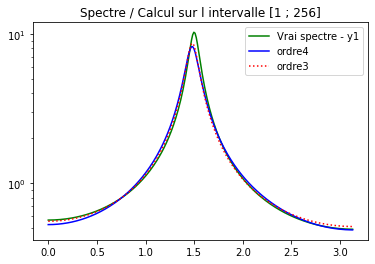

In [26]:
import numpy as np
Np = 256
m1=256; # largeur d une trame d analyse
m2=350; # paramètre utilisé pour définir le début d une trame
y1=np.transpose(np.array([*y[0:m1],0,0,0,0]))
y2=np.transpose(np.array([0,*y[0:m1],0,0,0]))
y3=np.transpose(np.array([0,0,*y[0:m1],0,0]))
y4=np.transpose(np.array([0,0,0,*y[0:m1],0]))
y5=np.transpose(np.array([0,0,0,0,*y[0:m1]]))
A=np.array([y1,y2,y3,y4,y5])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 5*5


#Calcul des coefficients par Yule-Walker
E=np.dot(-np.linalg.inv(D[0:4,0:4]),np.transpose(D[0,1:5])) #ordre 4
H=np.dot(-np.linalg.inv(D[0:3,0:3]),np.transpose(D[0,1:4])) #ordre 3
E1=np.transpose([1,*np.transpose(E)]) #vecteur de coefficients incluant a0(ordre 4)
H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 3)


# Tracé des spectres estimés
[h11,w]=freqz(1,E1,Np) # ordre 4
[h12,w]=freqz(1,H1,Np) # ordre 3
mag1=abs(h11)
mag2=abs(h12)

f,mag = spectre(a[0],E1,H1)
plt.figure()
plt.plot(y[0:m1])
plt.show()
plt.semilogy(
    f,mag[0], 'g',
    f,mag[1],'-b',
    f,mag[2],':r',
)
plt.legend(['Vrai spectre - y1', 'ordre4', 'ordre3'])
plt.title("Spectre / Calcul sur l intervalle [1 ; " + str(m1) + ']')

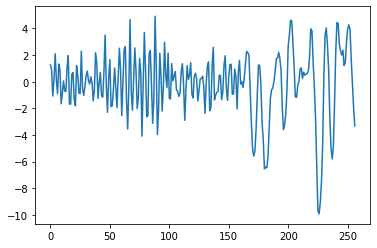

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [350; 605]')

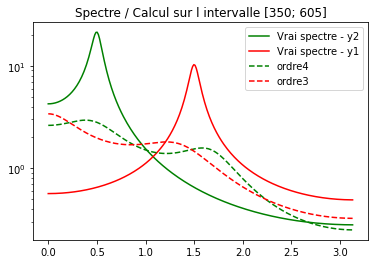

In [27]:
import numpy as np
Np = 256
m1=256; # largeur d une trame d analyse
m2=350; # paramètre utilisé pour définir le début d une trame
y1=np.transpose(np.array([*y[m2-1:m1+m2],0,0,0,0]))
y2=np.transpose(np.array([0,*y[m2-1:m1+m2],0,0,0]))
y3=np.transpose(np.array([0,0,*y[m2-1:m1+m2],0,0]))
y4=np.transpose(np.array([0,0,0,*y[m2-1:m1+m2],0]))
y5=np.transpose(np.array([0,0,0,0,*y[m2-1:m1+m2]]))
A=np.array([y1,y2,y3,y4,y5])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 5*5


#Calcul des coefficients par Yule-Walker
E=np.dot(-np.linalg.inv(D[0:4,0:4]),np.transpose(D[0,1:5])) #ordre 4
H=np.dot(-np.linalg.inv(D[0:3,0:3]),np.transpose(D[0,1:4])) #ordre 3
E1=np.transpose([1,*np.transpose(E)]) #vecteur de coefficients incluant a0(ordre 4)
H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 3)


# Tracé des spectres estimés
[h11,w]=freqz(1,E1,Np) # ordre 4
[h12,w]=freqz(1,H1,Np) # ordre 3
mag1=abs(h11)
mag2=abs(h12)

f,mag = spectre(a[0],a[1], E1,H1)
plt.figure()
plt.plot(y[m2-1:m1+m2])
plt.show()
plt.semilogy(
    f,mag[1], 'g',
    f,mag[0],'r',
    f,mag[2],'--g',
    f,mag[3],'--r',
    
)
plt.legend(['Vrai spectre - y2','Vrai spectre - y1', 'ordre4', 'ordre3'])
plt.title("Spectre / Calcul sur l intervalle [" + str(m2) +  "; " + str(m2+m1-1) + ']')

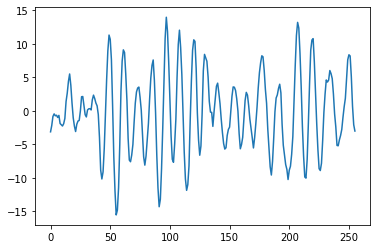

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [606; 861]')

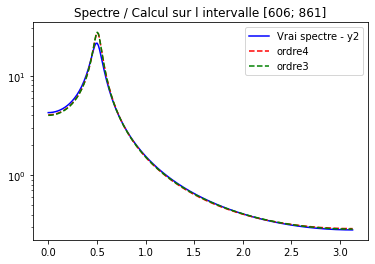

In [28]:
import numpy as np
Np = 256
m1=256; # largeur d une trame d analyse
m2=350; # paramètre utilisé pour définir le début d une trame
y1=np.transpose(np.array([*y[m2+m1:2*m1+m2],0,0,0,0]))
y2=np.transpose(np.array([0,*y[m2+m1:2*m1+m2],0,0,0]))
y3=np.transpose(np.array([0,0,*y[m2+m1:2*m1+m2],0,0]))
y4=np.transpose(np.array([0,0,0,*y[m2+m1:2*m1+m2],0]))
y5=np.transpose(np.array([0,0,0,0,*y[m2+m1:2*m1+m2]]))
A=np.array([y1,y2,y3,y4,y5])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 5*5


#Calcul des coefficients par Yule-Walker
E=np.dot(-np.linalg.inv(D[0:4,0:4]),np.transpose(D[0,1:5])) #ordre 4
H=np.dot(-np.linalg.inv(D[0:3,0:3]),np.transpose(D[0,1:4])) #ordre 3
E1=np.transpose([1,*np.transpose(E)]) #vecteur de coefficients incluant a0(ordre 4)
H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 3)


# Tracé des spectres estimés
[h11,w]=freqz(1,E1,Np) # ordre 4
[h12,w]=freqz(1,H1,Np) # ordre 3
mag1=abs(h11)
mag2=abs(h12)

f,mag = spectre(a[1], E1,H1)
plt.figure()
plt.plot(y[m2+m1:2*m1+m2])
plt.show()
plt.semilogy(
    f,mag[0], 'b',
    f,mag[1],'--r',
    f,mag[2],'--g',
   
    
)
plt.legend(['Vrai spectre - y2', 'ordre4', 'ordre3'])
plt.title("Spectre / Calcul sur l intervalle [" + str(m2+m1) +  "; " + str(m2+2*m1-1) + ']')

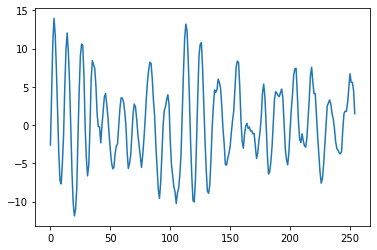

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [700; 955]')

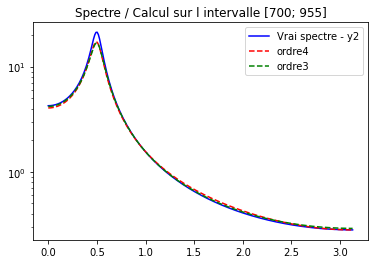

In [29]:
import numpy as np
Np = 256
m1=256; # largeur d une trame d analyse
m2=350; # paramètre utilisé pour définir le début d une trame
y1=np.transpose(np.array([*y[2*m2:m1+2*m2],0,0,0,0]))
y2=np.transpose(np.array([0,*y[2*m2:m1+2*m2],0,0,0]))
y3=np.transpose(np.array([0,0,*y[2*m2:m1+2*m2],0,0]))
y4=np.transpose(np.array([0,0,0,*y[2*m2:m1+2*m2],0]))
y5=np.transpose(np.array([0,0,0,0,*y[2*m2:m1+2*m2]]))
A=np.array([y1,y2,y3,y4,y5])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 5*5


#Calcul des coefficients par Yule-Walker
E=np.dot(-np.linalg.inv(D[0:4,0:4]),np.transpose(D[0,1:5])) #ordre 4
H=np.dot(-np.linalg.inv(D[0:3,0:3]),np.transpose(D[0,1:4])) #ordre 3
E1=np.transpose([1,*np.transpose(E)]) #vecteur de coefficients incluant a0(ordre 4)
H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 3)


# Tracé des spectres estimés
[h11,w]=freqz(1,E1,Np) # ordre 4
[h12,w]=freqz(1,H1,Np) # ordre 3
mag1=abs(h11)
mag2=abs(h12)

f,mag = spectre(a[1], E1,H1)
plt.figure()
plt.plot(y[2*m2:m1+2*m2-1])
plt.show()
plt.semilogy(
    f,mag[0], 'b',
    f,mag[1],'--r',
    f,mag[2],'--g',
   
    
)
plt.legend(['Vrai spectre - y2', 'ordre4', 'ordre3'])
plt.title("Spectre / Calcul sur l intervalle [" + str(2*m2) +  "; " + str(2*m2+m1-1) + ']')

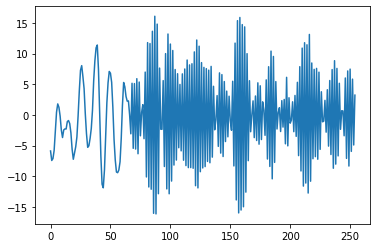

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [956; 1211]')

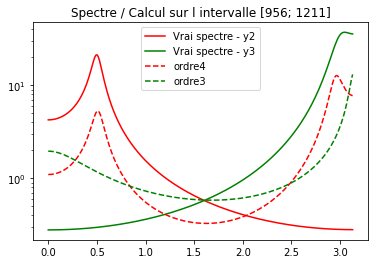

In [30]:
import numpy as np
Np = 256
m1=256; # largeur d une trame d analyse
m2=350; # paramètre utilisé pour définir le début d une trame
y1=np.transpose(np.array([*y[2*m2+m1:2*m1+2*m2],0,0,0,0]))
y2=np.transpose(np.array([0,*y[2*m2+m1:2*m1+2*m2],0,0,0]))
y3=np.transpose(np.array([0,0,*y[2*m2+m1:2*m1+2*m2],0,0]))
y4=np.transpose(np.array([0,0,0,*y[2*m2+m1:2*m1+2*m2],0]))
y5=np.transpose(np.array([0,0,0,0,*y[2*m2+m1:2*m1+2*m2]]))
A=np.array([y1,y2,y3,y4,y5])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 5*5


#Calcul des coefficients par Yule-Walker
E=np.dot(-np.linalg.inv(D[0:4,0:4]),np.transpose(D[0,1:5])) #ordre 4
H=np.dot(-np.linalg.inv(D[0:3,0:3]),np.transpose(D[0,1:4])) #ordre 3
E1=np.transpose([1,*np.transpose(E)]) #vecteur de coefficients incluant a0(ordre 4)
H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 3)


# Tracé des spectres estimés
[h11,w]=freqz(1,E1,Np) # ordre 4
[h12,w]=freqz(1,H1,Np) # ordre 3
mag1=abs(h11)
mag2=abs(h12)

f,mag = spectre(a[1],a[2], E1,H1)
plt.figure()
plt.plot(y[2*m2+m1:2*m1+2*m2-1])
plt.show()
plt.semilogy(
    f,mag[0], 'r',
    f,mag[1], 'g',
    f,mag[2],'--r',
    f,mag[3],'--g',
   
    
)
plt.legend(['Vrai spectre - y2','Vrai spectre - y3', 'ordre4', 'ordre3'])
plt.title("Spectre / Calcul sur l intervalle [" + str(2*m2+m1) +  "; " + str(2*m2+2*m1-1) + ']')

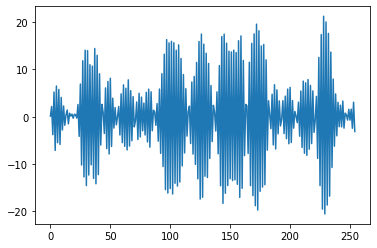

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [1212; 1467]')

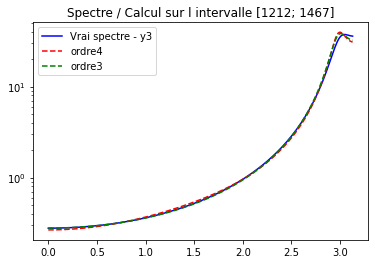

In [31]:
import numpy as np
Np = 256
m1=256; # largeur d une trame d analyse
m2=350; # paramètre utilisé pour définir le début d une trame
y1=np.transpose(np.array([*y[2*m2+2*m1:3*m1+2*m2],0,0,0,0]))
y2=np.transpose(np.array([0,*y[2*m2+2*m1:3*m1+2*m2],0,0,0]))
y3=np.transpose(np.array([0,0,*y[2*m2+2*m1:3*m1+2*m2],0,0]))
y4=np.transpose(np.array([0,0,0,*y[2*m2+2*m1:3*m1+2*m2],0]))
y5=np.transpose(np.array([0,0,0,0,*y[2*m2+2*m1:3*m1+2*m2]]))
A=np.array([y1,y2,y3,y4,y5])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 5*5


#Calcul des coefficients par Yule-Walker
E=np.dot(-np.linalg.inv(D[0:4,0:4]),np.transpose(D[0,1:5])) #ordre 4
H=np.dot(-np.linalg.inv(D[0:3,0:3]),np.transpose(D[0,1:4])) #ordre 3
E1=np.transpose([1,*np.transpose(E)]) #vecteur de coefficients incluant a0(ordre 4)
H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 3)


# Tracé des spectres estimés
[h11,w]=freqz(1,E1,Np) # ordre 4
[h12,w]=freqz(1,H1,Np) # ordre 3
mag1=abs(h11)
mag2=abs(h12)

f,mag = spectre(a[2], E1,H1)
plt.figure()
plt.plot(y[2*m2+2*m1:3*m1+2*m2-1])
plt.show()
plt.semilogy(
    f,mag[0], 'b',
    f,mag[1],'--r',
    f,mag[2],'--g',
   
    
)
plt.legend(['Vrai spectre - y3', 'ordre4', 'ordre3'])
plt.title("Spectre / Calcul sur l intervalle [" + str(2*m2+2*m1) +  "; " + str(3*m1+2*m2-1) + ']')